## Problem Statement: To find top 3 batsmen innings wise in IPL

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

Importing dataset 

In [7]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

Using a copy of dataset

In [8]:
df = deliveries.copy()

In [9]:
df.head(2)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


Getting the required data from gievn data i.e. cleaning of data

In [15]:
def byInning(df,current_inning):
    df = df[df.inning == current_inning]
    df.reset_index(inplace = True, drop = True)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs':'runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['id'].count()).reset_index().rename(columns = {'id':'balls'})
    inning = pd.DataFrame(df.groupby(['batsman'])['id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'id':'innings'})
    
    df = pd.merge(inning, runs, on = 'batsman').merge(balls, on = 'batsman')
    
    df['SR'] = df.apply(lambda x: 100*x['runs']/x['balls'], axis = 1)
    
    return df

Required data 1

In [79]:
ing1_df = byInning(df,1)

In [80]:
ing1_df.head()

,batsman,innings,runs,balls,SR
0,A Ashish Reddy,13,166,115,144.347826
1,A Chandila,2,4,7,57.142857
2,A Chopra,5,51,72,70.833333
3,A Choudhary,1,15,12,125.000000
4,A Dananjaya,1,4,5,80.000000


Required data 2

In [76]:
ing2_df = byInning(df,2)

In [75]:
ing2_df.head()

,innings,runs,balls,SR
batsman,,,,
K Gowtham,11,136,76,178.947368
N Pooran,11,325,185,175.675676
SM Curran,10,92,56,164.285714
AD Russell,31,679,420,161.666667
Bipul Sharma,8,119,74,160.810811


Now we will start actual analysis of data

In [30]:
ing1_df = ing1_df[(ing1_df.innings >= 5) & (ing1_df.balls >= 30)]

In [31]:
ing1_df = ing1_df.sort_values(by = 'SR', ascending = False)

In [32]:
ing1_df.head()

,batsman,innings,runs,balls,SR
30,AD Russell,30,838,462,181.385281
202,KK Cooper,6,54,31,174.193548
259,MM Ali,11,271,159,170.440252
268,MS Gony,7,68,40,170.000000
83,C de Grandhomme,10,133,79,168.354430


In [33]:
ing2_df = ing2_df[(ing2_df.innings >= 5) & (ing2_df.balls >= 30)]
ing2_df = ing2_df.sort_values(by = 'SR', ascending = False)
ing2_df.head()

,batsman,innings,runs,balls,SR
194,K Gowtham,11,136,76,178.947368
289,N Pooran,11,325,185,175.675676
406,SM Curran,10,92,56,164.285714
31,AD Russell,31,679,420,161.666667
82,Bipul Sharma,8,119,74,160.810811


In [73]:
ing1_df.set_index(keys='batsman', inplace = True)

In [61]:
ing2_df.set_index(keys='batsman', inplace = True)

In [74]:
ing1_df.head(3)

,innings,runs,balls,SR
batsman,,,,
AD Russell,30,838,462,181.385281
KK Cooper,6,54,31,174.193548
MM Ali,11,271,159,170.440252


In [62]:
ing2_df.head(3)

,innings,runs,balls,SR
batsman,,,,
K Gowtham,11,136,76,178.947368
N Pooran,11,325,185,175.675676
SM Curran,10,92,56,164.285714


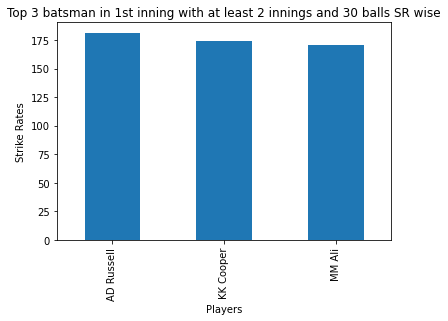

In [68]:
ing1_df['SR'].head(3).plot(kind='bar')
plt.xlabel('Players')
plt.ylabel('Strike Rates')
plt.title('Top 3 batsman in 1st inning with at least 2 innings and 30 balls SR wise')
plt.show()

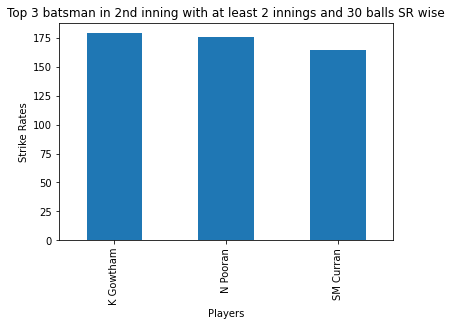

In [70]:
ing2_df['SR'].head(3).plot(kind='bar')
plt.xlabel('Players')
plt.ylabel('Strike Rates')
plt.title('Top 3 batsman in 2nd inning with at least 2 innings and 30 balls SR wise')
plt.show()